<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Métodos Funcionales en Aprendizaje Automático</div><br>
    <div style="font-size: x-large; color:gray">Diffusion Maps</div><br>
    <div style="font-size: large">Ángela Fernández Pascual - Universidad Autónoma de Madrid</div><br></div><hr>
</div>

**Initial Configuration**

This cell defines the configuration of Jupyter Notebooks.

In [1]:
%%html
<style>
    .qst {background-color: #b1cee3; padding:10px; border-radius: 5px; border: solid 2px #5D8AA8;}
    .qst:before {font-weight: bold; content:"Exercise"; display: block; margin: 0px 10px 10px 10px;}
                   
    .tqst {background-color: #97d0a7; padding:10px; border-radius: 5px; border: solid 2px #63BA97;}
    .tqst:before {font-weight: bold; content:"Team Exercise"; display: block; margin: 0px 10px 10px 10px;}
           
    h1, h2, h3 {color: #5D8AA8;}
    .text_cell_render p {text-align: justify; text-justify: inter-word;}
</style>

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

This cell imports the packages to be used.

In [5]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.datasets import make_swiss_roll

from mpl_toolkits.mplot3d import Axes3D
Axes3D

matplotlib.rc('figure', figsize=(15, 5))

seed = 123
my_cmap = plt.cm.Spectral

# My own
from scipy.spatial import distance

# Dataset

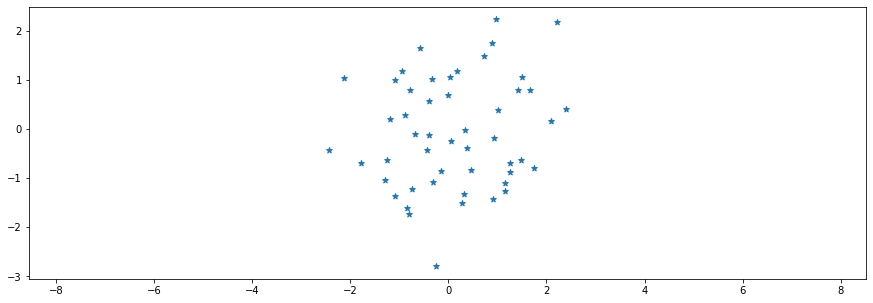

In [4]:
N=50
d=2

np.random.seed(seed)
X=np.random.randn(N,d)
plt.scatter(X[:,0], X[:,1], marker='*', cmap=my_cmap)
plt.axis('equal')
plt.show()

# Building a Graph

## Defining the affinity matrix

The first step in **Diffusion Maps** consist of building a symmetric weighted graph. For doing this, let's define the affinity matrix via a kernel matrix.

<div class="tqst">

* Define the affinity matrix in terms of the Gaussian Kernel.

    **Remark**: Do not compute the distance point by point, but in an efficient way for the whole matrix. You can use *scikit-learn* functions for computing the matrix distance. 
</div>

In [11]:
def rbf_kernel(X, Y, sigma):
    d = distance.cdist(X, Y, metric='euclidean')
    return np.exp(-0.5 * (d / sigma)**2)

In [37]:
sigma = 1.0
K = rbf_kernel(X, X, sigma=sigma)

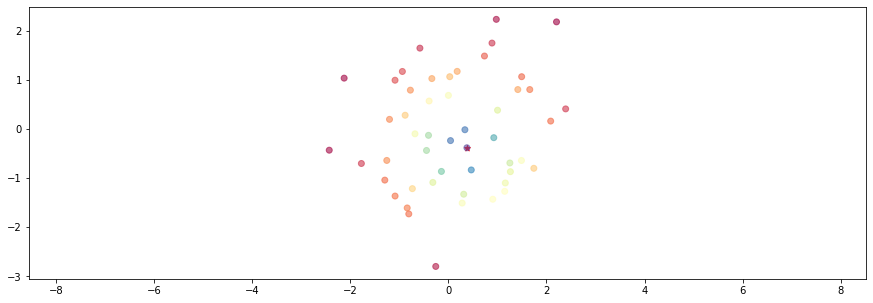

In [38]:
plt.scatter(X[-1,0], X[-1,1], color='r', marker='*')
plt.scatter(X[:,0], X[:,1], marker='o', c=K[-1], cmap=my_cmap, alpha=0.6)
plt.axis('equal')
plt.show()

# Random Walk over the graph

## Transition Probability

Once the graph is built, let's define a **transition probability** from the affinity matrix,to simulate a random walk over the graph.

<div class="tqst">

* Define the transition probability.

    **Remark**: To be efficient, you should not use a for loop. Try to do it using matrices and arrays  operations. Check at the end that each row sum 1.
</div>

## Steps in the probability

In Diffusion Maps, as it is studied as a diffusion process, it is important to check how the process evolves with time. Let's check the effect of the steps $t$ over the graph.

<div class="tqst">

* Compute $P^{t}$ for t=1..10.

* Check how much it affects the graph, for example by plotting it. 

</div>

## MC Distribution $\pi$

Let's analyze how evolves the graph and the stationary distribution $\pi$ with time. We are going to check how we tend to the stationary distribution, no matter how far we start from it.

<div class="tqst">

* Compute the stationary distribution $pi$.
    
* Check that $\pi_{t+1} = P \pi_{t} \to \pi$ (when $t\to\infty$), starting at an initial distribution far from the stationary one, for example $\pi_{0} = [1, 0, 0, ..., 0]$.
    
</div>

In [ ]:
#pi=
print("Original Distribution: ", pi)

pi_t=np.zeros((N,1));pi_t[0]=1
for t in range(100):
#    pi_t = 
    print("Step ", t, ": ", pi_t)

# Spectral Theory

<div class="tqst">

* Compute the eigendecomposition of $P$.

* Plot the eigenvalues to check how fast they tend to $0$.
    
* Compute the diffusion coordinates for `t=1`.
   
    **Remark**: Now the most important eigenvalues are the biggest ones.
</div>